# Data Collection

In [1]:
#importing librararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read dataset
df=pd.read_csv("employees.csv")

In [3]:
#print dataset
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


#Date Preocessiong

In [4]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [6]:
df.shape

(1000, 8)

In [12]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [14]:
df['Start Date']=pd.to_datetime(df['Start Date'])

In [15]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

# Handling missing values

#isnull() 
#notnull()
#dropnull()
#fillna()
#replace()
#intrerpolate()


In [16]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [17]:
df['Gender'].fillna("No Gender",inplace=True)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [18]:
mode=df['Senior Management'].mode().values[0]
df['Senior Management']=df['Senior Management'].replace(np.nan,mode)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [19]:
df=df.dropna(axis=0,how='any')
print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

#Data Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender'] = le.fit_transform\(df['Gender'])


SyntaxError: unexpected character after line continuation character (<ipython-input-31-9c26f6cdb802>, line 3)

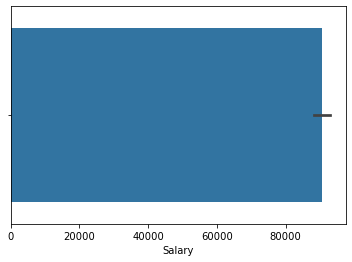

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Salary',data=df,)
plt.show()

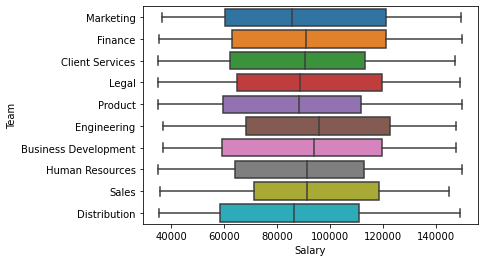

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Salary',y='Team',data=df)
plt.show()

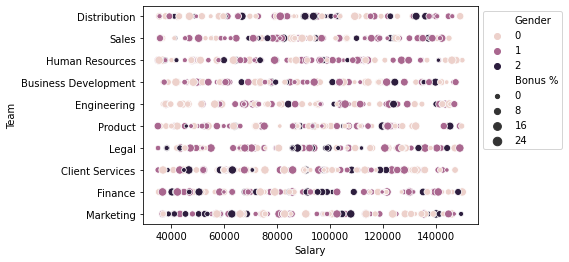

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Salary',y='Team',data=df,hue='Gender',size='Bonus %')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

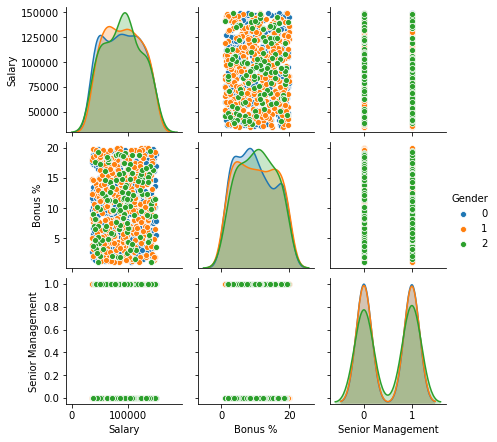

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue='Gender',height=2)